In [13]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Define the stock symbol and date range
symbol = 'CVX'
start_date = '2020-03-05'
end_date = '2021-09-01'

# Get the stock data
stock_data = yf.download(symbol, start=start_date, end=end_date)

# Prepare the data
data = stock_data['Close'].values
data = data.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data) * 0.80)
train_data, test_data = data[:train_size], data[train_size:]

# Convert the data into the appropriate format
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

window_size = 5
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Build the SVM model
model = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Train the model
model.fit(X_train, y_train)

# Make predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Invert the predictions to original scale
train_preds = scaler.inverse_transform(train_preds.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_preds = scaler.inverse_transform(test_preds.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate the root mean squared error (RMSE) for model evaluation
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')


[*********************100%***********************]  1 of 1 completed
Train RMSE: 2.80
Test RMSE: 2.55


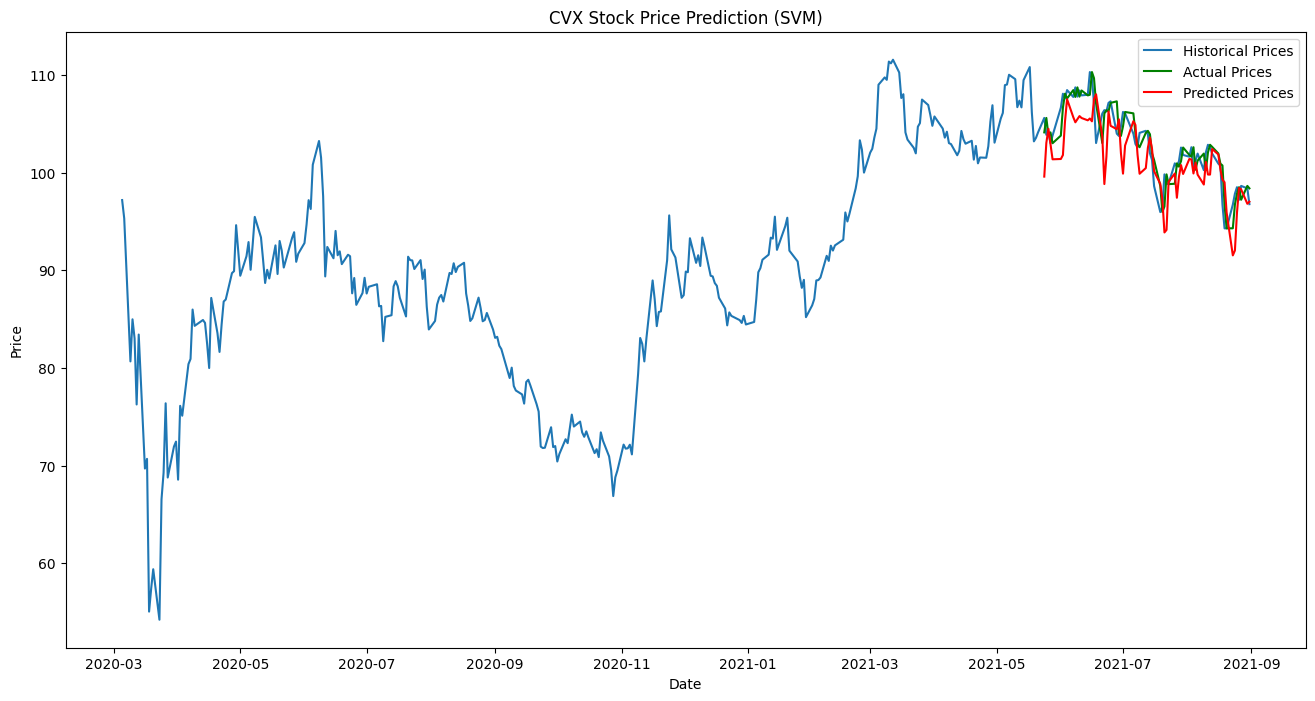

In [14]:
import matplotlib.pyplot as plt

# Get the dates for the predictions
pred_dates = stock_data.iloc[train_size+window_size+1:].index

# Combine the actual and predicted prices in a single DataFrame
actual_prices = pd.DataFrame(y_test, columns=['Actual'], index=pred_dates)
predicted_prices = pd.DataFrame(test_preds, columns=['Predicted'], index=pred_dates)
combined_prices = pd.concat([stock_data['Close'], actual_prices, predicted_prices], axis=1)

# Plot the actual and predicted prices on a graph
plt.figure(figsize=(16, 8))
plt.plot(combined_prices['Close'], label='Historical Prices')
plt.plot(combined_prices['Actual'], label='Actual Prices', color='green')
plt.plot(combined_prices['Predicted'], label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{symbol} Stock Price Prediction (SVM)')
plt.legend()
plt.show()


In [16]:
print("Predicted Stock Prices and Dates:\n")
for date, row in predicted_prices.iterrows():
    print(f"{date.strftime('%Y-%m-%d')}: {row['Predicted']:.2f}")


Predicted Stock Prices and Dates:

2021-05-24: 99.59
2021-05-25: 103.05
2021-05-26: 104.48
2021-05-27: 102.90
2021-05-28: 101.36
2021-06-01: 101.40
2021-06-02: 101.80
2021-06-03: 105.22
2021-06-04: 107.52
2021-06-07: 105.68
2021-06-08: 105.15
2021-06-09: 105.46
2021-06-10: 105.79
2021-06-11: 105.59
2021-06-14: 105.36
2021-06-15: 105.54
2021-06-16: 105.25
2021-06-17: 107.53
2021-06-18: 108.02
2021-06-21: 103.71
2021-06-22: 98.83
2021-06-23: 101.67
2021-06-24: 106.27
2021-06-25: 104.80
2021-06-28: 104.45
2021-06-29: 105.46
2021-06-30: 101.98
2021-07-01: 99.90
2021-07-02: 102.78
2021-07-06: 105.26
2021-07-07: 104.88
2021-07-08: 101.86
2021-07-09: 99.88
2021-07-12: 100.46
2021-07-13: 102.55
2021-07-14: 103.60
2021-07-15: 102.44
2021-07-16: 100.15
2021-07-19: 98.85
2021-07-20: 97.21
2021-07-21: 93.87
2021-07-22: 94.13
2021-07-23: 99.06
2021-07-26: 99.91
2021-07-27: 97.43
2021-07-28: 99.58
2021-07-29: 100.77
2021-07-30: 99.86
2021-08-02: 101.39
2021-08-03: 101.36
2021-08-04: 99.91
2021-08-05